<a href="https://colab.research.google.com/github/rashmidubey2410/IMDB-Movie-Review-Sentiment-Classification-using-RNN---LSTM/blob/master/IMDB_Movie_Review_Sentiment_Classification_using_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis using LSTM 

The data was collected by Stanford researchers and was used in a 2011 paper.


data link: http://ai.stanford.edu/~amaas/data/sentiment/

**1) Load in and visualize the data**

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Download and set up data**

In [6]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17465344/17464789 [==============================] - 0s 0us/step


In [9]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [11]:
X_train.shape,X_test.shape


((25000,), (25000,))

In [15]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [18]:
X_train.shape,X_test.shape

((25000, 500), (25000, 500))

In [19]:
vocab_size=20000
embed_size=128

**Build Model**

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,Embedding

In [24]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Epoch 1/3
391/391 [==============================] - 228s 584ms/step - loss: 0.4729 - accuracy: 0.7638 - val_loss: 0.3137 - val_accuracy: 0.8707
Epoch 2/3
391/391 [==============================] - 225s 576ms/step - loss: 0.2903 - accuracy: 0.8847 - val_loss: 0.3246 - val_accuracy: 0.8619
Epoch 3/3
391/391 [==============================] - 226s 577ms/step - loss: 0.2418 - accuracy: 0.9050 - val_loss: 0.3026 - val_accuracy: 0.8748


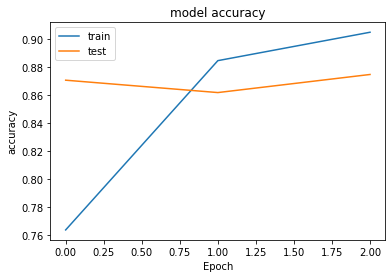

In [26]:
# plot training and validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

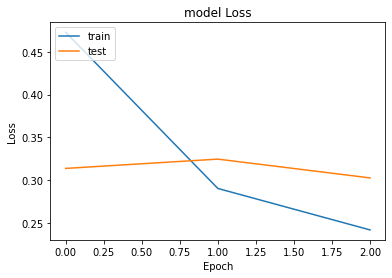

In [27]:
# plot training and validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [28]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.48%
